In [12]:
using Revise, Pkg
Pkg.activate("../.")
using DataFrames, VegaLite, VegaDatasets
using Distributions, KernelDensity
using LightGraphs, GraphPlot, SimpleWeightedGraphs, LinearAlgebra, DataFrames, Random, Colors

 Activating environment at `~/MEGAsync/EMAp/VegaGraphs/Project.toml`


In [164]:
Random.seed!(7)
df = DataFrame(rand([0,1],10,20));

In [165]:
function gen_graph(df)
    g = SimpleWeightedGraph(ncol(df))
    ew = Int[]
    pairings = [] 
    for i in 1:ncol(df), j in i+1:ncol(df) # iterate over all combinations of columns
        w = dot(df[:, i], df[:, j])        # calculate how many times (i,j) occurs
        if w > 0
            push!(ew, w)
            add_edge!(g, i, j, w)
            push!(pairings,[i,j])
        end
    end
#     gplot(g,nodelabel=names(df),edgelinewidth=ew)
#     gplot(g)
    return (g,ew)
end

function get_edges(g,node_x,node_y)
    edges_p1 = []
    edges_p2 = []
    edges_w  = Float64[]
    for i in edges(g)
        push!(edges_p1, i.src)
        push!(edges_p1, i.src)
        push!(edges_p2, i.dst)
        push!(edges_p2, i.dst)
        push!(edges_w, i.weight)
        push!(edges_w, i.weight)
    end
    
    edges_node  = Int[]
    edges_pairs = []
    for i in 1:size(edges_p1)[1]
        if i % 2 == 0
            push!(edges_node,edges_p2[i])
        else
            push!(edges_node,edges_p1[i])
        end
        push!(edges_pairs,[edges_p1[i],edges_p2[i]])
    end 
    graph_edges = DataFrames.DataFrame(edges_x = node_x[edges_node], edges_y = node_y[edges_node],
                       pairs = edges_pairs, ew = edges_w, node = edges_node) 
    return graph_edges
end

get_edges (generic function with 1 method)

In [166]:
g,ew = gen_graph(df)
node_x, node_y = GraphPlot.spring_layout(g);
graph_edges = get_edges(g,node_x,node_y);
# graph_edges[:ew] = graph_edges[:ew]/10;
graph_nodes = DataFrame(keywords = names(df),node_x=node_x, node_y=node_y,centrality=betweenness_centrality(g));

WARN Dropping {"field":null,"legend":null} from channel "size" since it does not contain any data field, datum, value, or signal.
WARN Dropping {"field":null,"legend":null} from channel "size" since it does not contain any data field, datum, value, or signal.


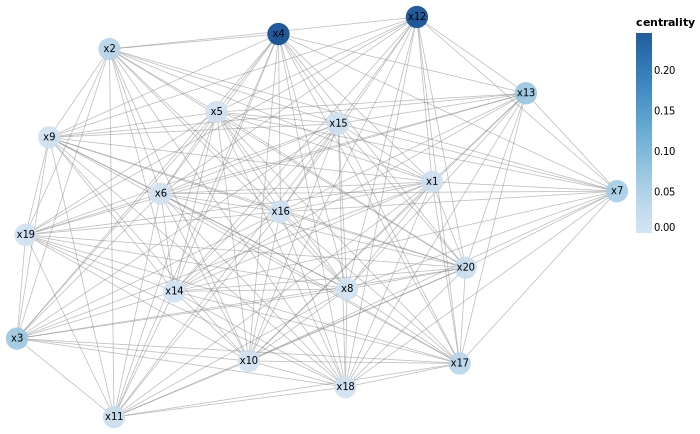

In [194]:
v1 =@vlplot(
    data = graph_nodes,
    layer=[
    {
        mark={"type"=:circle,clip=false,opacity=0.9,size=500,color="#9ecae9"},
        x={"node_x:q",axis=nothing},
        y={"node_y:q",axis=nothing},
        size={field=nothing,legend=nothing},
        color={"centrality:q", scale={scheme="blues"}},
        tooltip=[{field="keywords","type"="nominal"}],
        selection={
            grid={
                    type=:interval,
                    bind=:scales,
                }
        }},
    { 
        mark={"type"=:text,clip=false,opacity=1,size=10},
        x={"node_x:q",axis=nothing},
        y={"node_y:q",axis=nothing},
        text={"keywords","type"="nominal"}
    }]
)

v2 =@vlplot(
    mark={"type"=:line,color="gray",clip=false,size=0.8,opacity=0.5},
    data = graph_edges,
    encoding={
    x={"edges_x:q",axis=nothing},
    y={"edges_y:q",axis=nothing},
#     size={"ew:q",legend=nothing},
    detail={"pairs:o"}},
    width=600,
    height=400
);

graph_plot = @vlplot(view={stroke=nothing})+v2+v1

In [168]:
using LightGraphs, GraphPlot, SimpleWeightedGraphs, LinearAlgebra, DataFrames, Random, CSV, Colors
ENV["COLUMNS"] = 2000;

In [169]:
Random.seed!(7)
df = DataFrame(rand([0,1],20,20));

In [170]:
g = SimpleWeightedGraph(ncol(df))

{20, 0} undirected simple Int64 graph with Float64 weights

In [171]:
ew = Int[]
pairings = [] 
for i in 1:ncol(df), j in i+1:ncol(df) # iterate over all combinations of columns
    w = dot(df[:, i], df[:, j])        # calculate how many times (i,j) occurs
    if w > 0
        push!(ew, w)
        add_edge!(g, i, j, w)
        push!(pairings,[i,j])
    end
end

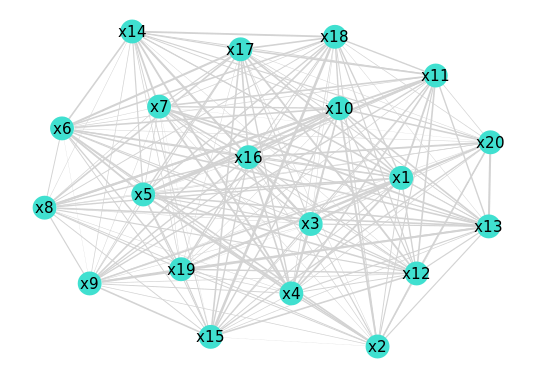

In [172]:
gplot(g,nodelabel=names(df),edgelinewidth=ew)

In [155]:
function gen_graphs(df)
    g = SimpleWeightedGraph(size(df)[2])
    ew = Int[]
    pairings = [] 
    for i in 1:size(df)[2], j in i+1:size(df)[2] # iterate over all combinations of columns
        w = dot(df[:, i], df[:, j])        # calculate how many times (i,j) occurs
        if w > 0
            push!(ew, w)
            add_edge!(g, i, j, w)
            push!(pairings,[i,j])
        end
    end
    return (g,ew)
end


gen_graphs (generic function with 1 method)

In [156]:
gen_graphs(rand([0,1],20,20))

({20, 190} undirected simple Int64 graph with Float64 weights, [3, 4, 5, 4, 2, 4, 2, 3, 6, 2  …  1, 3, 5, 3, 2, 4, 2, 3, 5, 3])

In [139]:
data = rand([0,1],20,20);

In [142]:
size(df)

(5, 20)

In [137]:
for i = 1:5
    println(df[!,i] == df[:,i])
end

true
true
true
true
true
